# COM2004/3004 Assignment 2: Code Snippets

v1.0 30/10/2016

This notebook contains some Python code snippets that you may find useful when working on COM2004/COM3004 assignment 2.


## 1. Loading the data

The cell below shows you how to load the data from the pickle file.

In [1]:
import pickle
data = pickle.load(open("assignment2.pkl", "rb"))
train_data = data['train_data']
train_labels = data['train_labels']
test1 = data['test1']
test2 = data['test2']
words  = data['words']

## 2. Displaying a character

The cell below displays a sample of the character data as an image.

3

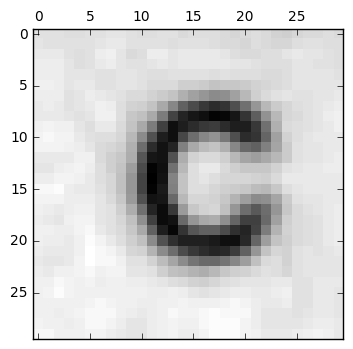

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

n = 18 # Select the 18th sample
pixels = train_data[n, :]
plt.matshow(np.reshape(pixels, (30, 30), order='F'), cmap=cm.gray)
train_labels[18]

## 3. The $k$-Nearest Neighbour Classifier

The cell below contains the $k$-NN classifier function that is being used in the lab classes.

In [3]:
def classify(train, train_labels, test):
    """Nearest neighbour classification

    train - matrix of training data (one sample per row)
    train_labels - corresponding training data labels
    test - matrix of samples to classify

    returns: labels - vector of test data labels
    """
    x = np.dot(test, train.transpose()) 
    modtest = np.sqrt(np.sum(test*test, axis=1))
    modtrain = np.sqrt(np.sum(train*train, axis=1))
    dist = x / np.outer(modtest, modtrain.transpose())  # cosine distance
    nearest = np.argmax(dist, axis=1)
    labels = train_labels[nearest]
    return labels


# 4. Using the classifier

The code below shows an example of using the classifier. 

(For demonstration purposes the training data has been cut into smaller training and test sets. In the assignment you will use all the training data for training and will be testing on test samples extracted from the images.)

In [4]:
import numpy as np

# Use first 599 samples of train_data for training
train1_data = train_data[0:599, :]
train1_labels = train_labels[0:599]

# Use last 100 samples of train_data for testing
test1_data = train_data[599:, :]
test1_labels = train_labels[599:]

# Count how many samples in the test set
n_test = test1_labels.shape[0]

# Classify the test set to get an array of guessed labels
test1_guessed = classify(train1_data, train1_labels, test1_data)

# Compare guesses against true labels and compute percent correct
pcor = np.sum(test1_guessed == test1_labels) * 100.0 / n_test

print(pcor)  # This should give 92% correct

92.0
